In [1]:
%reload_ext autoreload
%autoreload 2

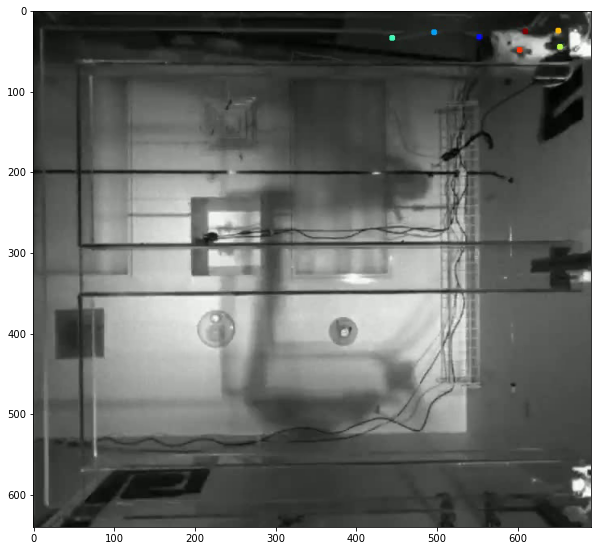

In [2]:
import cv2
import matplotlib.pyplot as plt

video_filename = '../Raw-Data/jaq/Jaq_d3_12_wtrackDeepCut_resnet50_WtrackSep5shuffle1_1030000_labeled.mp4'

video = cv2.VideoCapture(video_filename)

frame_size = (int(video.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)))
frame_rate = video.get(cv2.CAP_PROP_FPS)
n_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
frames = []

for time_ind in range(3500):
    is_grabbed, frame = video.read()
    frames.append(frame)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10, 10))
plt.imshow(frame)

In [3]:
n_frames

113666

In [4]:
frame_rate

125.0

In [5]:
from src.load_data import get_position_info

epoch_key = 'Jaq', 3, 12
position_to_linearize = ['tailBase_x', 'tailBase_y']
max_distance_from_well = 30
min_distance_traveled = 50

position_info = get_position_info(
    epoch_key,
    position_to_linearize=position_to_linearize,
    max_distance_from_well=max_distance_from_well,
    min_distance_traveled=min_distance_traveled,
)

Failed to load file: /Users/edeno/Documents/GitHub/pose_analysis/src/../Raw-Data/Jaq/JaqDIO03.mat
No DIO file found, using distance from well to segment trials
Failed to load file: /Users/edeno/Documents/GitHub/pose_analysis/src/../Raw-Data/Jaq/JaqDIO03.mat
No DIO file found, inferring correct inbound/outbound from task rules


In [6]:
position_info

,nose_x,nose_y,nose_vel,tailBase_x,tailBase_y,tailBase_vel,tailMid_x,tailMid_y,tailMid_vel,tailTip_x,...,arm_name,labeled_segments,from_well,to_well,task,is_correct,turn,linear_position,linear_velocity,linear_speed
time,,,,,,,,,,,,,,,,,,,,,
0 days 04:32:35.871892304,38.592945,36.733215,0.0,35.089916,36.553150,0.0,1.690973,7.566112,135.795897,4.449474,...,Right Arm,1,NaN,NaN,NaN,False,NaN,351.974247,-1.257245,1.257245
0 days 04:32:35.879893648,43.521641,39.520859,0.0,39.532642,41.654194,0.0,1.892033,8.451593,130.245511,4.971426,...,Right Arm,1,NaN,NaN,NaN,False,NaN,356.370046,-1.257245,1.257245
0 days 04:32:35.887894831,48.344154,42.361450,0.0,43.733799,46.728745,0.0,2.086552,9.299206,122.022601,5.471640,...,Right Arm,1,NaN,NaN,NaN,False,NaN,360.524529,-2.513579,2.513579
0 days 04:32:35.895885724,52.943996,45.241474,0.0,47.544476,51.663654,0.0,2.271361,10.090735,111.325587,5.939188,...,Right Arm,1,NaN,NaN,NaN,False,NaN,364.289828,-3.768099,3.768099
0 days 04:32:35.903887020,57.218693,48.147049,0.0,50.836815,56.362099,0.0,2.443118,10.809726,99.178506,6.364511,...,Right Arm,1,NaN,NaN,NaN,False,NaN,367.538978,-5.019916,5.019916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 04:47:45.482417306,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,Left Arm,84,NaN,NaN,NaN,False,NaN,161.447258,-3.677687,3.677687
0 days 04:47:45.490418688,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,Left Arm,84,NaN,NaN,NaN,False,NaN,161.447258,-2.945375,2.945375
0 days 04:47:45.498420071,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,Left Arm,84,NaN,NaN,NaN,False,NaN,161.447258,-2.210914,2.210914


In [7]:
n_diff = n_frames - position_info.shape[0]
n_diff

10

In [8]:
from scipy.io import loadmat
import numpy as np
import networkx as nx
from src.parameters import ANIMALS

def get_track_segments(epoch_key, animals):
    '''

    Parameters
    ----------
    epoch_key : tuple
    animals : dict of namedtuples

    Returns
    -------
    track_segments : ndarray, shape (n_segments, n_nodes, n_space)
    center_well_position : ndarray, shape (n_space,)

    '''
    linearcoord = loadmat('../Raw-Data/jaq/wTrack_coordinates.mat', squeeze_me=True)['coords']
    track_segments = [np.stack(((arm[:-1, :, 0], arm[1:, :, 0])), axis=1)
                      for arm in linearcoord]
    center_well_position = track_segments[0][0][0]
    track_segments = np.concatenate(track_segments)
    _, unique_ind = np.unique(track_segments, return_index=True, axis=0)
    return track_segments[np.sort(unique_ind)], center_well_position


def make_track_graph(epoch_key, animals, convert_to_pixels=False):
    '''

    Parameters
    ----------
    epoch_key : tuple, (animal, day, epoch)
    animals : dict of namedtuples

    Returns
    -------
    track_graph : networkx Graph
    center_well_id : int

    '''
    track_segments, center_well_position = get_track_segments(
        epoch_key, animals)
    nodes = track_segments.copy().reshape((-1, 2))
    _, unique_ind = np.unique(nodes, return_index=True, axis=0)
    nodes = nodes[np.sort(unique_ind)]
    
    x_pixel_to_cm = 0.1602
    y_pixel_to_cm = 0.1712
    if convert_to_pixels:
        nodes[:, 0] /= x_pixel_to_cm
        nodes[:, 1] /= y_pixel_to_cm
        center_well_position[0] /= x_pixel_to_cm
        center_well_position[1] /= y_pixel_to_cm

    edges = np.zeros(track_segments.shape[:2], dtype=np.int)
    for node_id, node in enumerate(nodes):
        edge_ind = np.nonzero(np.isin(track_segments, node).sum(axis=2) > 1)
        edges[edge_ind] = node_id

    edge_distances = np.linalg.norm(
        np.diff(track_segments, axis=-2).squeeze(axis=-2), axis=1)

    track_graph = nx.Graph()



    for node_id, node_position in enumerate(nodes):
        track_graph.add_node(node_id, pos=tuple(node_position))

    for edge, distance in zip(edges, edge_distances):
        nx.add_path(track_graph, edge, distance=distance)

    center_well_id = np.unique(
        np.nonzero(np.isin(nodes, center_well_position).sum(axis=1) > 1)[0])[0]

    return track_graph, center_well_id

track_graph, center_well_id = make_track_graph(epoch_key, ANIMALS)

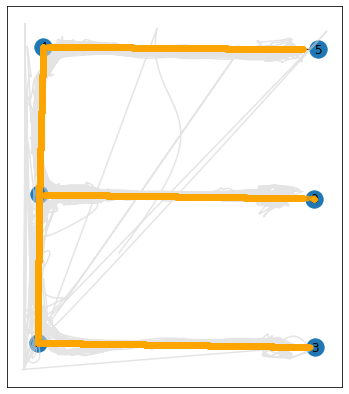

In [9]:
from src.parameters import ANIMALS
from loren_frank_data_processing.track_segment_classification import plot_track

position = position_info.loc[:, position_to_linearize].values
projected_position = position_info.loc[:, ["projected_x_position", "projected_y_position"]].values
track_graph, center_well_id = make_track_graph(epoch_key, ANIMALS)

fig, ax = plt.subplots(figsize=(6, 7))
plot_track(track_graph, ax=ax)
ax.plot(position[:, 0], position[:, 1], color='lightgrey', alpha=0.6)
ax.scatter(projected_position[:, 0], projected_position[:, 1], zorder=10, alpha=0.5, color="orange", s=25)

In [10]:
x_pixel_to_cm=0.1602
y_pixel_to_cm=0.1712

In [11]:
frame.shape

(640, 692, 3)

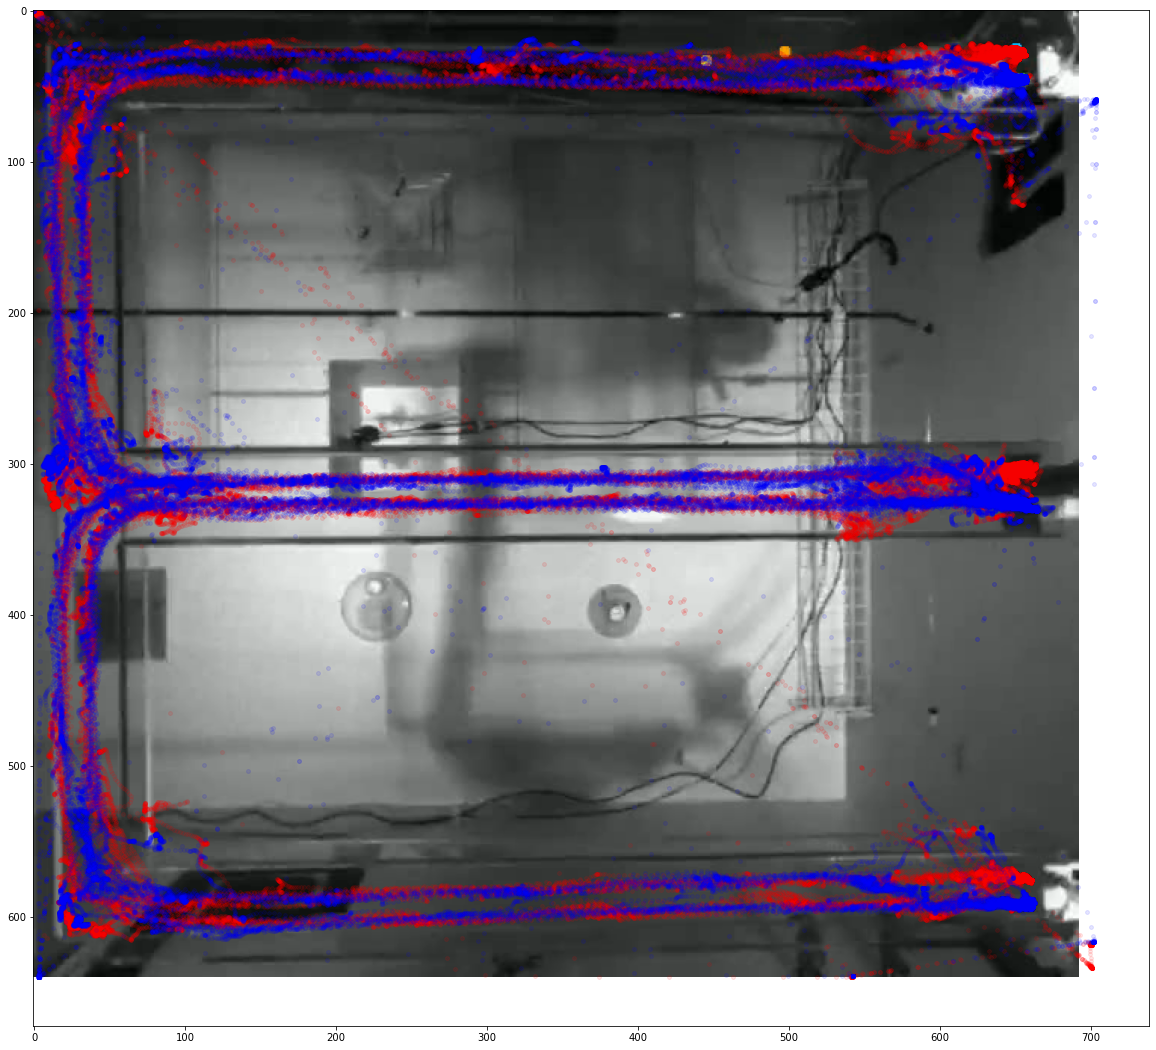

In [12]:
time_ind = len(frames) - 5

plt.figure(figsize=(20, 20))
plt.imshow(frames[time_ind - n_diff])

# plt.scatter(position_info.nose_x / x_pixel_to_cm,
#             position_info.nose_y / y_pixel_to_cm, color='blue', marker='.', s=1, alpha=0.5)
# plt.scatter(position_info.forepawL_x / x_pixel_to_cm,
#             position_info.forepawL_y / y_pixel_to_cm, color='red', marker='.', s=1, alpha=0.5)
plt.scatter(position_info.forepawR_x / x_pixel_to_cm,
            position_info.forepawR_y / y_pixel_to_cm, color='red', marker='.', s=60, alpha=0.1)
plt.scatter(position_info.forepawL_x / x_pixel_to_cm,
            position_info.forepawL_y / y_pixel_to_cm, color='blue', marker='.', s=60, alpha=0.1)

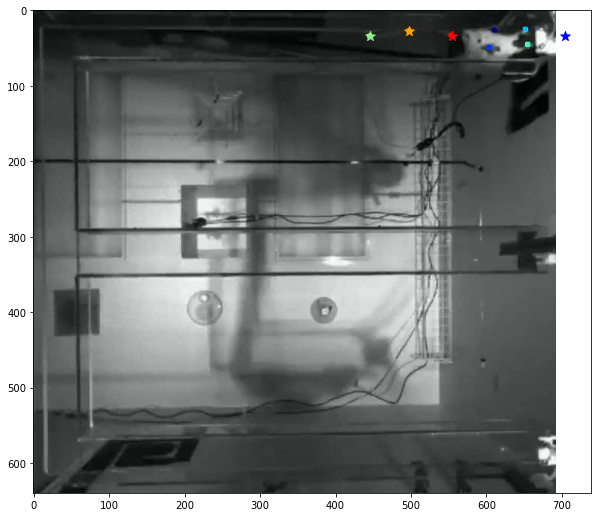

In [13]:
time_ind = len(frames) - 1


plt.figure(figsize=(10, 10))
plt.imshow(frames[time_ind - n_diff])

plt.scatter(position_info.nose_x[time_ind] / x_pixel_to_cm,
            position_info.nose_y[time_ind] / y_pixel_to_cm, color='blue', marker='*', s=100)

plt.scatter(position_info.tailBase_x[time_ind] / x_pixel_to_cm,
            position_info.tailBase_y[time_ind] / y_pixel_to_cm, color='red', marker='*', s=100)
plt.scatter(position_info.tailMid_x[time_ind] / x_pixel_to_cm,
            position_info.tailMid_y[time_ind] / y_pixel_to_cm, color='orange', marker='*', s=100)
plt.scatter(position_info.tailTip_x[time_ind] / x_pixel_to_cm,
            position_info.tailTip_y[time_ind] / y_pixel_to_cm, color='lightgreen', marker='*', s=100)

In [14]:
from ipywidgets import interact

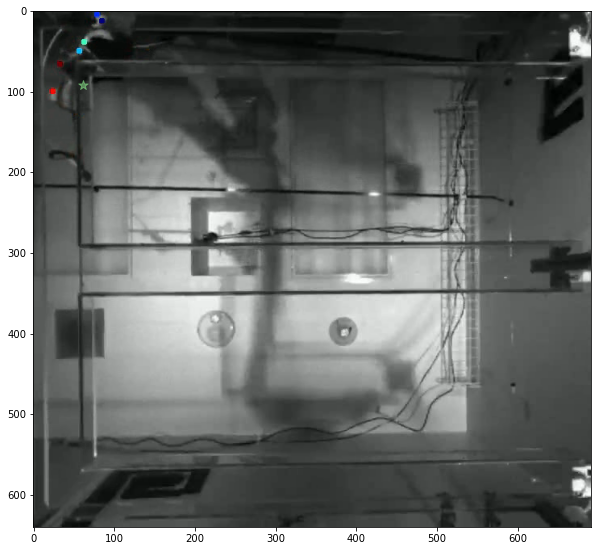

In [15]:
time_ind = 1600


plt.figure(figsize=(10, 10))
plt.imshow(frames[time_ind - n_diff])

# plt.scatter(position_info.nose_x[time_ind] / y_pixel_to_cm,
#             position_info.nose_y[time_ind] / y_pixel_to_cm, color='blue', marker='*', s=100)
# plt.scatter(position_info.tailBase_x[time_ind] / y_pixel_to_cm,
#             position_info.tailBase_y[time_ind] / y_pixel_to_cm, color='red', marker='*', s=100)
# plt.scatter(position_info.tailMid_x[time_ind] / y_pixel_to_cm,
#             position_info.tailMid_y[time_ind] / y_pixel_to_cm, color='orange', marker='*', s=100)
plt.scatter(position_info.tailTip_x[time_ind] / x_pixel_to_cm,
            position_info.tailTip_y[time_ind] / y_pixel_to_cm, color='lightgreen', marker='*', s=100, alpha=0.5)

In [16]:
position_info.shape

(113656, 39)

In [17]:
n_frames - position_info.shape[0]

10

In [18]:
# import napari
# from dask_image.imread import imread

# stack = imread("../Raw-Data/jaq/png/*.png")
# with napari.gui_qt():
#     napari.view_image(stack, contrast_limits=[0,2000])

In [19]:
position_info.columns

Index(['nose_x', 'nose_y', 'nose_vel', 'tailBase_x', 'tailBase_y',
       'tailBase_vel', 'tailMid_x', 'tailMid_y', 'tailMid_vel', 'tailTip_x',
       'tailTip_y', 'tailTip_vel', 'forepawL_x', 'forepawL_y', 'forepawL_vel',
       'forepawR_x', 'forepawR_y', 'forepawR_vel', 'hindpawL_x', 'hindpawL_y',
       'hindpawL_vel', 'hindpawR_x', 'hindpawR_y', 'hindpawR_vel', 'body_dir',
       'linear_distance', 'projected_x_position', 'projected_y_position',
       'track_segment_id', 'arm_name', 'labeled_segments', 'from_well',
       'to_well', 'task', 'is_correct', 'turn', 'linear_position',
       'linear_velocity', 'linear_speed'],
      dtype='object')

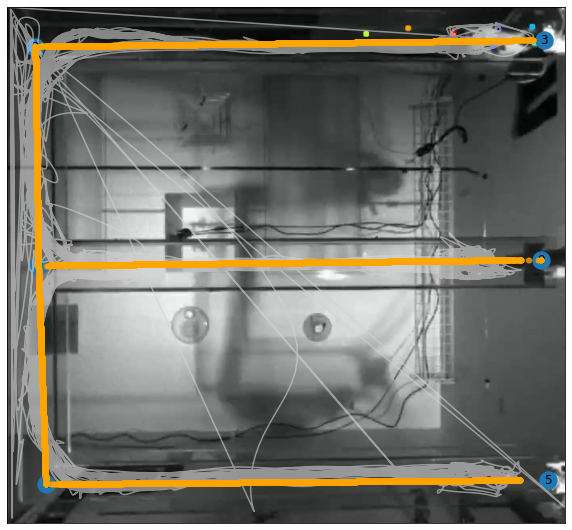

In [20]:
time_ind = len(frames) - 1

track_graph_pixels, center_well_id = make_track_graph(epoch_key, ANIMALS, convert_to_pixels=True)
plt.figure(figsize=(10, 10))
plt.imshow(frames[time_ind - n_diff])
plot_track(track_graph_pixels)
plt.plot(position[:, 0] / x_pixel_to_cm, position[:, 1] / y_pixel_to_cm, color='lightgrey', alpha=0.6)
plt.scatter(projected_position[:, 0] / x_pixel_to_cm, projected_position[:, 1] / y_pixel_to_cm, zorder=10, alpha=0.5, color="orange", s=25)

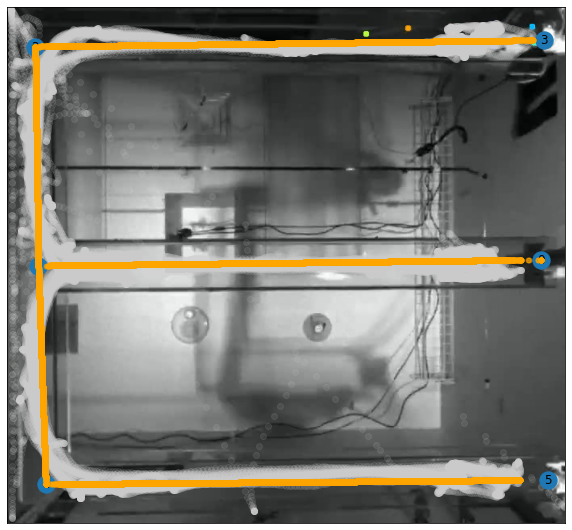

In [21]:
time_ind = len(frames) - 1

track_graph_pixels, center_well_id = make_track_graph(epoch_key, ANIMALS, convert_to_pixels=True)
plt.figure(figsize=(10, 10))
plt.imshow(frames[time_ind - n_diff])
plot_track(track_graph_pixels)
plt.scatter(position[:, 0] / x_pixel_to_cm, position[:, 1] / y_pixel_to_cm, color='lightgrey', alpha=0.1)
plt.scatter(projected_position[:, 0] / x_pixel_to_cm, projected_position[:, 1] / y_pixel_to_cm, zorder=10, alpha=0.5, color="orange", s=25)

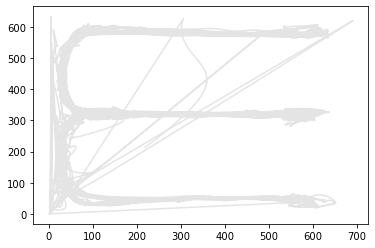

In [22]:
plt.plot(position[:, 0] / x_pixel_to_cm, position[:, 1] / y_pixel_to_cm, color='lightgrey', alpha=0.6)

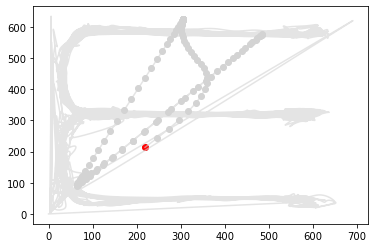

In [23]:
plt.plot(position[:, 0] / x_pixel_to_cm, position[:, 1] / y_pixel_to_cm, color='lightgrey', alpha=0.6)
plt.scatter(position[:125, 0] / x_pixel_to_cm, position[:125, 1] / y_pixel_to_cm, color='lightgrey', alpha=1)
plt.scatter(position[0, 0] / x_pixel_to_cm, position[0, 1] / y_pixel_to_cm, color='red', alpha=1)

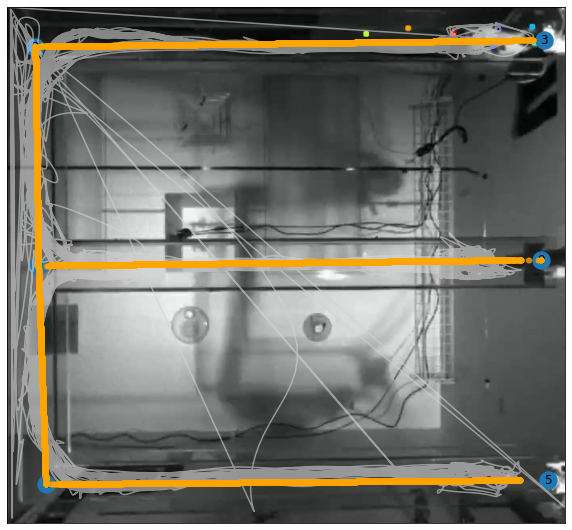

In [24]:
 time_ind = len(frames) - 1

track_graph_pixels, center_well_id = make_track_graph(epoch_key, ANIMALS, convert_to_pixels=True)
plt.figure(figsize=(10, 10))
plt.imshow(frames[time_ind - n_diff])
plot_track(track_graph_pixels)
plt.plot(position[:, 0] / x_pixel_to_cm, position[:, 1] / y_pixel_to_cm, color='lightgrey', alpha=0.6)
plt.scatter(projected_position[:, 0] / x_pixel_to_cm, projected_position[:, 1] / y_pixel_to_cm, zorder=10, alpha=0.5, color="orange", s=25)

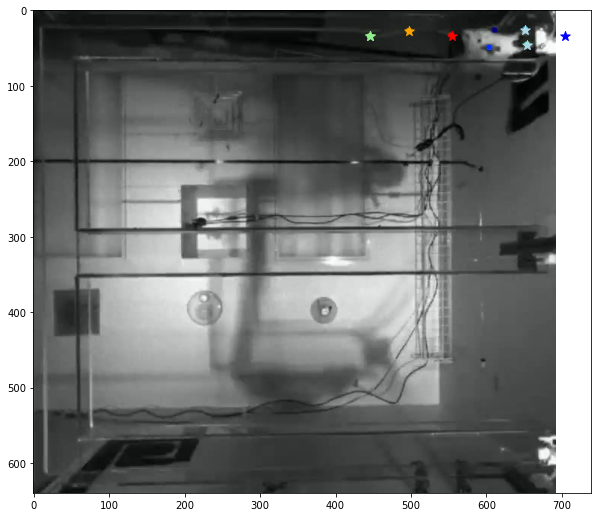

In [25]:
time_ind = len(frames) - 1


plt.figure(figsize=(10, 10))
plt.imshow(frames[time_ind])

plt.scatter(position_info.nose_x[time_ind] / x_pixel_to_cm,
            position_info.nose_y[time_ind] / y_pixel_to_cm, color='blue', marker='*', s=100)

plt.scatter(position_info.tailBase_x[time_ind] / x_pixel_to_cm,
            position_info.tailBase_y[time_ind] / y_pixel_to_cm, color='red', marker='*', s=100)
plt.scatter(position_info.tailMid_x[time_ind] / x_pixel_to_cm,
            position_info.tailMid_y[time_ind] / y_pixel_to_cm, color='orange', marker='*', s=100)
plt.scatter(position_info.tailTip_x[time_ind] / x_pixel_to_cm,
            position_info.tailTip_y[time_ind] / y_pixel_to_cm, color='lightgreen', marker='*', s=100)
plt.scatter(position_info.tailTip_x[time_ind] / x_pixel_to_cm,
            position_info.tailTip_y[time_ind] / y_pixel_to_cm, color='lightgreen', marker='*', s=100)
plt.scatter(position_info.forepawL_x[time_ind] / x_pixel_to_cm,
            position_info.forepawL_y[time_ind] / y_pixel_to_cm, color='lightblue', marker='*', s=100)
plt.scatter(position_info.forepawR_x[time_ind] / x_pixel_to_cm,
            position_info.forepawR_y[time_ind] / y_pixel_to_cm, color='lightblue', marker='*', s=100)

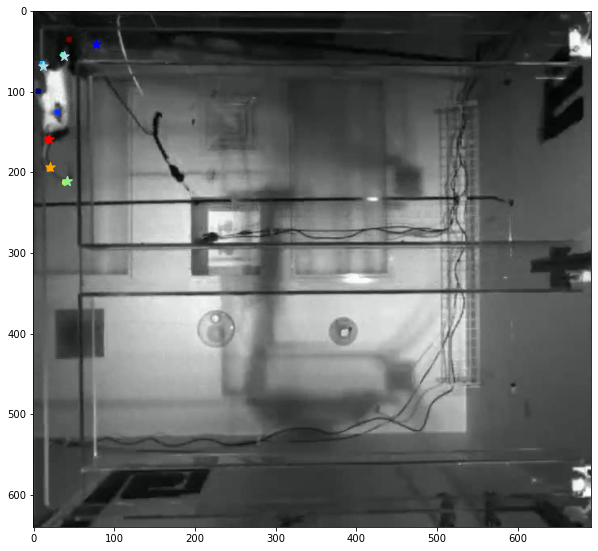

In [26]:
time_ind = len(frames) - 350


plt.figure(figsize=(10, 10))
plt.imshow(frames[time_ind])

plt.scatter(position_info.nose_x[time_ind] / x_pixel_to_cm,
            position_info.nose_y[time_ind] / y_pixel_to_cm, color='blue', marker='*', s=100)

plt.scatter(position_info.tailBase_x[time_ind] / x_pixel_to_cm,
            position_info.tailBase_y[time_ind] / y_pixel_to_cm, color='red', marker='*', s=100)
plt.scatter(position_info.tailMid_x[time_ind] / x_pixel_to_cm,
            position_info.tailMid_y[time_ind] / y_pixel_to_cm, color='orange', marker='*', s=100)
plt.scatter(position_info.tailTip_x[time_ind] / x_pixel_to_cm,
            position_info.tailTip_y[time_ind] / y_pixel_to_cm, color='lightgreen', marker='*', s=100)
plt.scatter(position_info.tailTip_x[time_ind] / x_pixel_to_cm,
            position_info.tailTip_y[time_ind] / y_pixel_to_cm, color='lightgreen', marker='*', s=100)
plt.scatter(position_info.forepawL_x[time_ind] / x_pixel_to_cm,
            position_info.forepawL_y[time_ind] / y_pixel_to_cm, color='lightblue', marker='*', s=100)
plt.scatter(position_info.forepawR_x[time_ind] / x_pixel_to_cm,
            position_info.forepawR_y[time_ind] / y_pixel_to_cm, color='lightblue', marker='*', s=100)

In [27]:
position_info.columns

Index(['nose_x', 'nose_y', 'nose_vel', 'tailBase_x', 'tailBase_y',
       'tailBase_vel', 'tailMid_x', 'tailMid_y', 'tailMid_vel', 'tailTip_x',
       'tailTip_y', 'tailTip_vel', 'forepawL_x', 'forepawL_y', 'forepawL_vel',
       'forepawR_x', 'forepawR_y', 'forepawR_vel', 'hindpawL_x', 'hindpawL_y',
       'hindpawL_vel', 'hindpawR_x', 'hindpawR_y', 'hindpawR_vel', 'body_dir',
       'linear_distance', 'projected_x_position', 'projected_y_position',
       'track_segment_id', 'arm_name', 'labeled_segments', 'from_well',
       'to_well', 'task', 'is_correct', 'turn', 'linear_position',
       'linear_velocity', 'linear_speed'],
      dtype='object')

In [28]:
position_names = ['nose', 'tailBase', 'tailMid', 'tailTip', 'forepawL', 'forepawR', 'hindpawL', 'hindpawR']
x_pixel_to_cm = 0.1602
y_pixel_to_cm = 0.1712



In [29]:
import cv2
import numpy as np
from tqdm.auto import tqdm


def make_video(video_filename, position_info, output_video_filename='output.avi',
               x_pixel_to_cm=0.1602, y_pixel_to_cm=0.1712, disable_progressbar=False):
    RGB_PINK = (234, 82, 111)
    RGB_YELLOW = (253, 231, 76)
    RGB_WHITE = (255, 255, 255)
    
    video = cv2.VideoCapture(video_filename)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    
    frame_size = (int(video.get(cv2.CAP_PROP_FRAME_WIDTH)),
                  int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    frame_rate = video.get(cv2.CAP_PROP_FPS)
    #     n_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    n_frames = position_info.shape[0]

    out = cv2.VideoWriter(output_video_filename, fourcc, frame_rate,
                          frame_size, True)
    
    # Convert to pixels
    position_names = ['nose', 'tailBase', 'tailMid', 'tailTip', 'forepawL',
                      'forepawR', 'hindpawL', 'hindpawR']
    pixel_to_cm = np.asarray([x_pixel_to_cm, y_pixel_to_cm])
    positions = {position: np.asarray(position_info[[f"{position}_x", f"{position}_y"]]) / pixel_to_cm
                 for position in position_names}
    
    
    LINE_THICKNESS = 2 # pixels
    TIP_LENGTH = 0.5 # length of arrow tip in fraction of line thickness?
    SHIFT = cv2.CV_8U
    LINE_TYPE = 8
    
    RADIUS = 8 # pixels
    
    # Direction of body
    orient = np.asarray(position_info["body_dir"])
    orient_start = positions["tailBase"].copy()
    orient_end = (orient_start +
                  RADIUS * np.stack((np.cos(orient), np.sin(orient)), axis=1))
    
    # Linearized Position
    linear_position = np.asarray(position_info[["projected_x_position", "projected_y_position"]]) / pixel_to_cm


    for time_ind in tqdm(range(n_frames - 1), desc='frames',
                         disable=disable_progressbar):
        is_grabbed, frame = video.read()
        if is_grabbed:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            for name in position_names:
                position = positions[name][time_ind]
                if ~np.any(np.isnan(position)):
                    cv2.circle(img=frame,
                               center=tuple(position.astype(int)),
                               radius=RADIUS,
                               color=RGB_PINK,
                               thickness=-1, # negative means filled
                               shift=SHIFT)

            if ~np.any(np.isnan(linear_position[time_ind])):
                cv2.circle(img=frame,
                           center=tuple(linear_position[time_ind].astype(int)),
                           radius=RADIUS // 2,
                           color=RGB_YELLOW,
                           thickness=-1, # negative means filled
                           shift=SHIFT)

            if (~np.any(np.isnan(orient_start[time_ind])) &
                ~np.any(np.isnan(orient_end[time_ind]))):
                cv2.arrowedLine(img=frame,
                                pt1=tuple(orient_start[time_ind].astype(int)),
                                pt2=tuple(orient_end[time_ind].astype(int)),
                                color=RGB_WHITE,
                                thickness=LINE_THICKNESS,
                                line_type=LINE_TYPE,
                                shift=SHIFT,
                                tipLength=TIP_LENGTH)
            frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
            out.write(frame)
        else:
            break

    video.release()
    out.release()
    cv2.destroyAllWindows()


In [30]:
make_video(video_filename, position_info, output_video_filename='output2.avi')